# Playground for Fisheye

In [70]:
import torch
import PIL
import numpy as np
import math
from IPython.display import display
import torchvision

In [14]:
# Import Dataset
# Data Transforming for Paris6K
paris6k_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((256,256)),               
    torchvision.transforms.ToTensor()
])
paris6k_dataset = torchvision.datasets.ImageFolder(
    '/workspace/Datasets/paris6k/', transform=paris6k_transform)

In [23]:
def display_image(index, dataset):
    """
    Display a single image
    """
    picked_image = torchvision.transforms.functional.to_pil_image(
        dataset[index][0]
    )
    picked_label = int(dataset[index][1])
    picked_label_str = dataset.classes[picked_label]
    all_data_count = len(dataset)
    # Display 
    print("Img Idx : {}/{}\nLabel[{}]: {}".format(index, all_data_count, picked_label, picked_label_str))
    display(picked_image)

Img Idx : 4/6392
Label[0]: defense


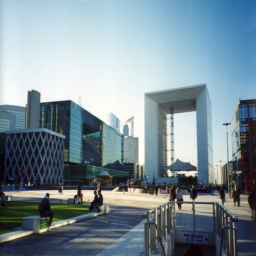

In [25]:
pick_index = 4
display_image(pick_index, paris6k_dataset)

## Transformation to Fisheye

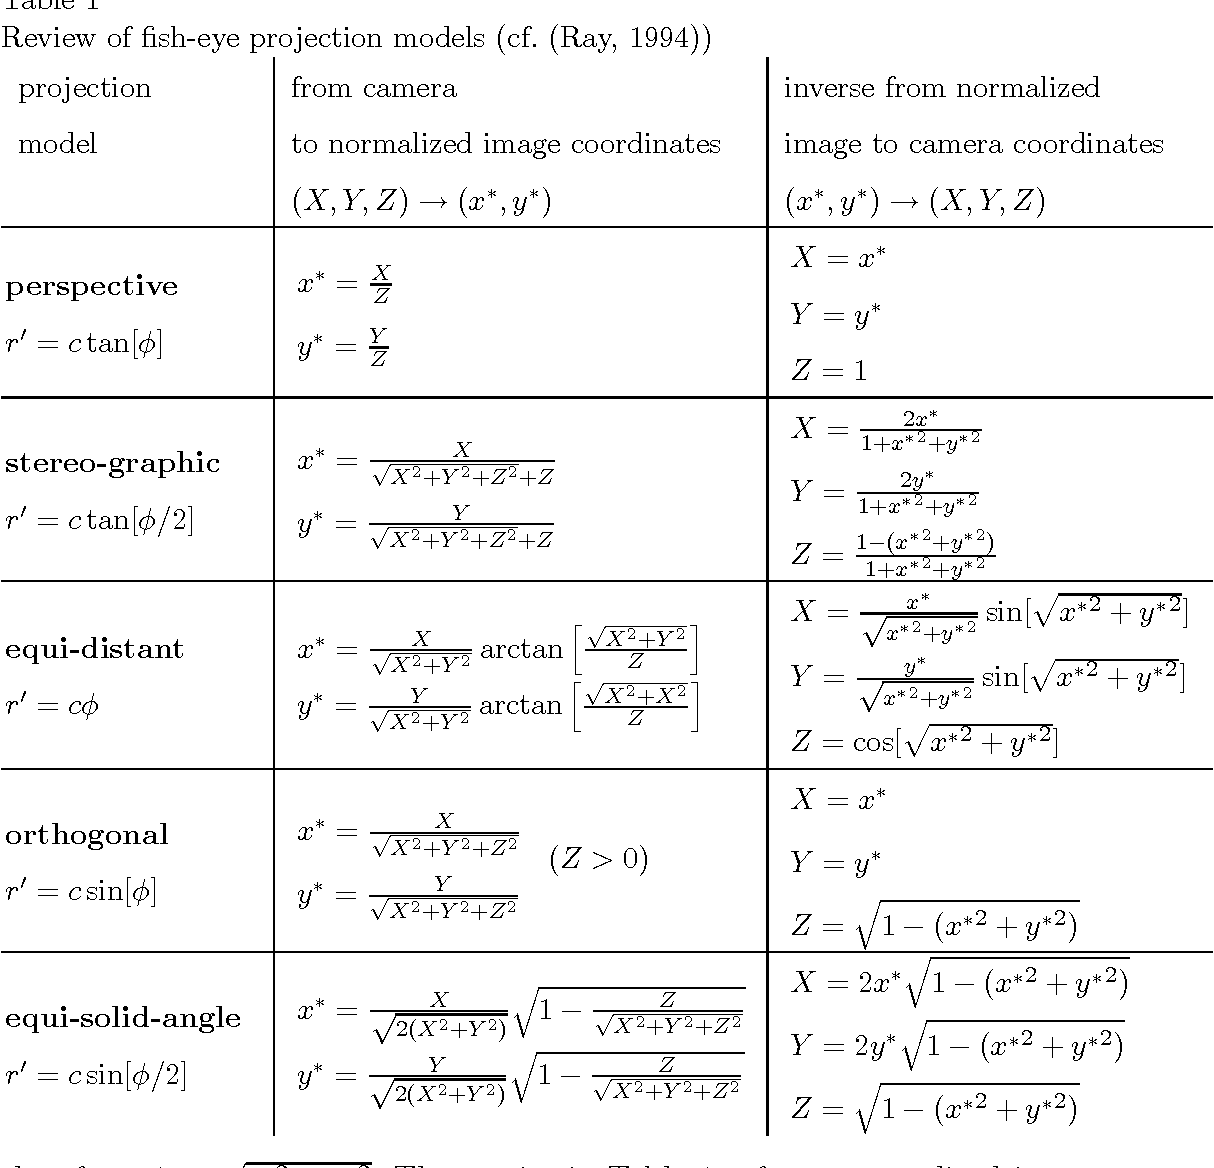

In [57]:
pil_image = torchvision.transforms.functional.to_pil_image(
        paris6k_dataset[pick_index][0]
)
numpy_image = np.asarray(pil_image)
# Add Alpha
# im = PIL.Image.fromarray(numpy.uint8(I))

# numpy_image = numpy_image.transpose(2,0,1)

In [68]:
cropped = numpy_image[0:40,0:20]

In [69]:
display(PIL.Image.fromarray(np.uint8(cropped)))

In [50]:
numpy_image.shape

(256, 256, 4)

In [ ]:
def pinhole_to_fisheye(img):
    """
    Given Pinhole Image
    return the fisheye-distorted version of it
    """
    width, height = float(img.shape[0]), float(img.shape[1])
    
    alpha_image = np.full((img.shape[0], img.shape[1]), 255)
    input_image = np.dstack([img, alpha_image])
    
    # Target Result
    result_img = np.zeros_like(input_image)
    
    # Iterate Through Every Pixel
    for row in range(height): # Y
        for col in range(width): # X
            x = col
            y = row
            
            # Bound row/col to [-1,1] where 0 is the center of lenses
            normalize_pos_x = float( (2*x - width) / width )
            normalize_pos_y = float( (2*y - height) / height )
            
            # Get Distance from lenses center
            radius_from_center = math.sqrt( normalize_pos_x**2, normalize_pos_y**2)
            
            # Get Distorted Cell (ask norm_pos , tell distorted_pos)
            x_distort, y_distort = fisheye_model(
                normalize_pos_x, 
                normalize_pos_y,
                radius_from_center,
                distortion_coeff
            )
            